In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib finance API for finance specific graphs
import mplfinance as mpf
%matplotlib inline

print(np.__version__)
print(pd.__version__)
print(mpf.__version__)

1.20.3
1.3.4
0.12.9b7


In [2]:
# data source from NASDAQ, since Apr 19, 2013 to Apr 18, 2023, total 10 years data
df_aapl = pd.read_csv('HistoricalData_1681945366693.csv')

In [3]:
# show the data frame of AAPL stock price
df_aapl

,Date,Close/Last,Volume,Open,High,Low
0,04/18/2023,$166.47,49923010,$166.10,$167.41,$165.65
1,04/17/2023,$165.23,41516220,$165.09,$165.39,$164.03
2,04/14/2023,$165.21,49386480,$164.59,$166.32,$163.82
3,04/13/2023,$165.56,68445650,$161.63,$165.80,$161.42
4,04/12/2023,$160.10,50133060,$161.22,$162.06,$159.78
...,...,...,...,...,...,...
2512,04/25/2013,$14.585,383835326,$14.6866,$14.7836,$14.5357
2513,04/24/2013,$14.4808,969409452,$14.055,$14.8304,$14.0179
2514,04/23/2013,$14.5046,601968679,$14.4282,$14.585,$14.2432
2515,04/22/2013,$14.2382,428903828,$14.0229,$14.3643,$13.9741


In [4]:
df_aapl.shape

(2517, 6)

In [5]:
# show the data type right after the import to see if any data cleansing is needed
df_aapl.dtypes

Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [6]:
# change Date datatype to datetime format
df_aapl['Date']=df_aapl['Date'].astype('datetime64[ns]')

In [7]:
df_aapl.dtypes

Date          datetime64[ns]
Close/Last            object
Volume                 int64
Open                  object
High                  object
Low                   object
dtype: object

In [8]:
#set Date as the index for each row of data
df_aapl.set_index('Date', inplace=True)

In [9]:
df_aapl.dtypes

Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [10]:
# rename column to avoid further regex issue
df_aapl=df_aapl.rename(columns={'Close/Last':'Close'})

In [11]:
df_aapl.dtypes

Close     object
Volume     int64
Open      object
High      object
Low       object
dtype: object

In [12]:
df_aapl.head()

,Close,Volume,Open,High,Low
Date,,,,,
2023-04-18,$166.47,49923010,$166.10,$167.41,$165.65
2023-04-17,$165.23,41516220,$165.09,$165.39,$164.03
2023-04-14,$165.21,49386480,$164.59,$166.32,$163.82
2023-04-13,$165.56,68445650,$161.63,$165.80,$161.42
2023-04-12,$160.10,50133060,$161.22,$162.06,$159.78


In [13]:
# remove $ sign on the 1st column
df_aapl['Close'] = df_aapl['Close'].replace({'\$':''},regex=True)

In [14]:
df_aapl

,Close,Volume,Open,High,Low
Date,,,,,
2023-04-18,166.47,49923010,$166.10,$167.41,$165.65
2023-04-17,165.23,41516220,$165.09,$165.39,$164.03
2023-04-14,165.21,49386480,$164.59,$166.32,$163.82
2023-04-13,165.56,68445650,$161.63,$165.80,$161.42
2023-04-12,160.10,50133060,$161.22,$162.06,$159.78
...,...,...,...,...,...
2013-04-25,14.585,383835326,$14.6866,$14.7836,$14.5357
2013-04-24,14.4808,969409452,$14.055,$14.8304,$14.0179
2013-04-23,14.5046,601968679,$14.4282,$14.585,$14.2432


In [15]:
# remove $ sign on remaining columns
df_aapl['Open']=df_aapl['Open'].replace({'\$':''},regex=True)
df_aapl['High']=df_aapl['High'].replace({'\$':''},regex=True)
df_aapl['Low']=df_aapl['Low'].replace({'\$':''},regex=True)

In [16]:
# Check data
df_aapl

,Close,Volume,Open,High,Low
Date,,,,,
2023-04-18,166.47,49923010,166.10,167.41,165.65
2023-04-17,165.23,41516220,165.09,165.39,164.03
2023-04-14,165.21,49386480,164.59,166.32,163.82
2023-04-13,165.56,68445650,161.63,165.80,161.42
2023-04-12,160.10,50133060,161.22,162.06,159.78
...,...,...,...,...,...
2013-04-25,14.585,383835326,14.6866,14.7836,14.5357
2013-04-24,14.4808,969409452,14.055,14.8304,14.0179
2013-04-23,14.5046,601968679,14.4282,14.585,14.2432


In [17]:
# Check data
df_aapl.dtypes

Close     object
Volume     int64
Open      object
High      object
Low       object
dtype: object

In [18]:
# change Object datatype to float
df_aapl['Close']=df_aapl['Close'].astype('float64')
df_aapl['Open']=df_aapl['Open'].astype('float64')
df_aapl['High']=df_aapl['High'].astype('float64')
df_aapl['Low']=df_aapl['Low'].astype('float64')

In [19]:
# Check data
df_aapl.dtypes

Close     float64
Volume      int64
Open      float64
High      float64
Low       float64
dtype: object

In [20]:
# simple statistics for current dataframe
df_aapl.describe()

,Close,Volume,Open,High,Low
count,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000
mean,66.312178,1.579857e+08,66.259434,67.015278,65.543258
std,50.221203,1.058471e+08,50.169811,50.831727,49.544330
min,13.947500,3.519586e+07,13.856100,14.271400,13.753600
25%,27.757500,8.865312e+07,27.715000,28.025000,27.395000
50%,43.125000,1.250075e+08,43.135000,43.557600,42.845000
75%,116.790000,1.923173e+08,117.260000,118.980000,115.660000
max,182.010000,1.065209e+09,182.630000,182.940000,179.120000


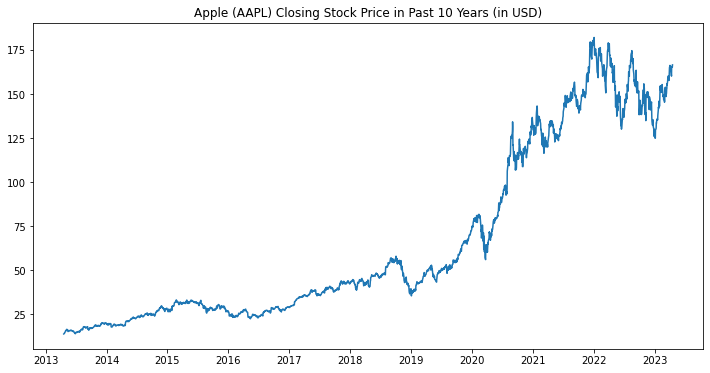

In [21]:
# using procedural approach in matplotlib
# a simple line graph to show shock price history in past 10 years
plt.figure(figsize=(12, 6))
plt.title('Apple (AAPL) Closing Stock Price in Past 10 Years (in USD)')
plt.plot(df_aapl.index,df_aapl['Close'])
plt.show()

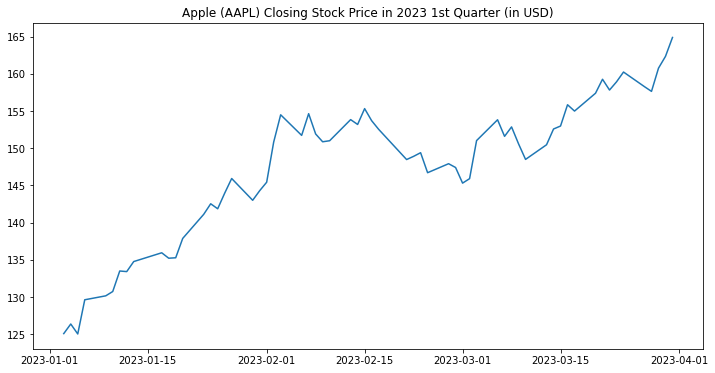

In [22]:
# using procedural approach in matplotlib
# a simple line graph to show shock price history in 1st quarter in 2023
mask = (df_aapl.index > "2023-01-01") & (df_aapl.index <= "2023-03-31")
df_aapl_2023 = df_aapl.loc[mask]

plt.figure(figsize=(12, 6))
plt.title('Apple (AAPL) Closing Stock Price in 2023 1st Quarter (in USD)')
plt.plot(df_aapl_2023.index,df_aapl_2023['Close'])
plt.show()

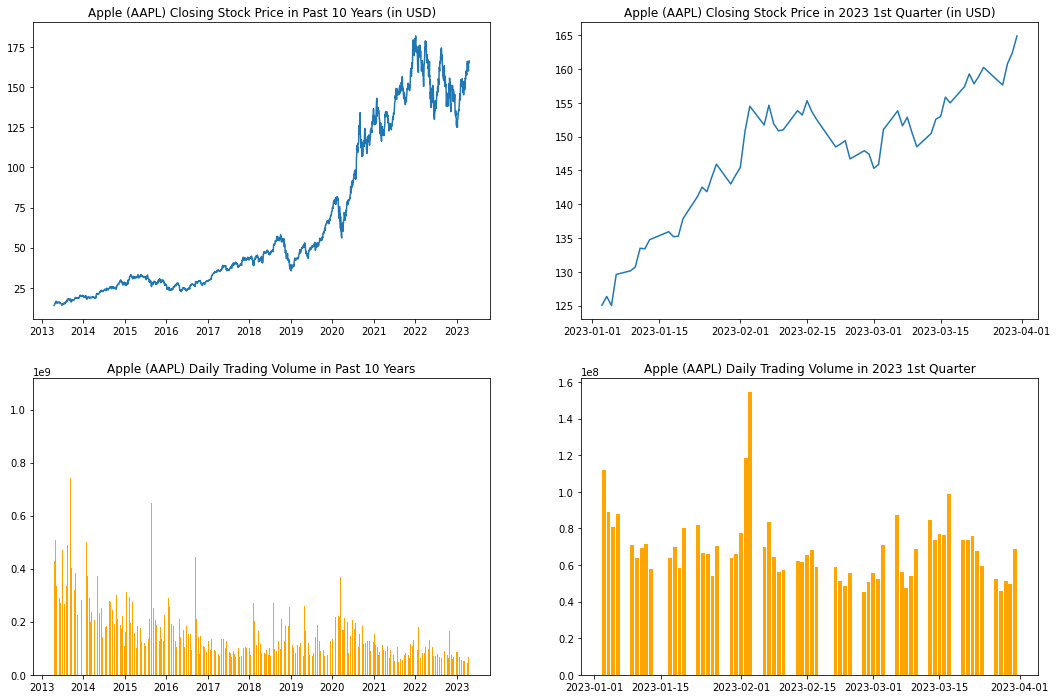

In [23]:
# using object-oriented approach in matplotlib
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

ax[0][0].set_title('Apple (AAPL) Closing Stock Price in Past 10 Years (in USD)')
ax[0][0].plot(df_aapl.index,df_aapl['Close'])

ax[0][1].set_title('Apple (AAPL) Closing Stock Price in 2023 1st Quarter (in USD)')
ax[0][1].plot(df_aapl_2023.index,df_aapl_2023['Close'])

ax[1][0].set_title('Apple (AAPL) Daily Trading Volume in Past 10 Years')
ax[1][0].bar(df_aapl.index,df_aapl['Volume'],color=('#FFA500'))

ax[1][1].set_title('Apple (AAPL) Daily Trading Volume in 2023 1st Quarter')
ax[1][1].bar(df_aapl_2023.index,df_aapl_2023['Volume'],color=('#FFA500'))

plt.show()

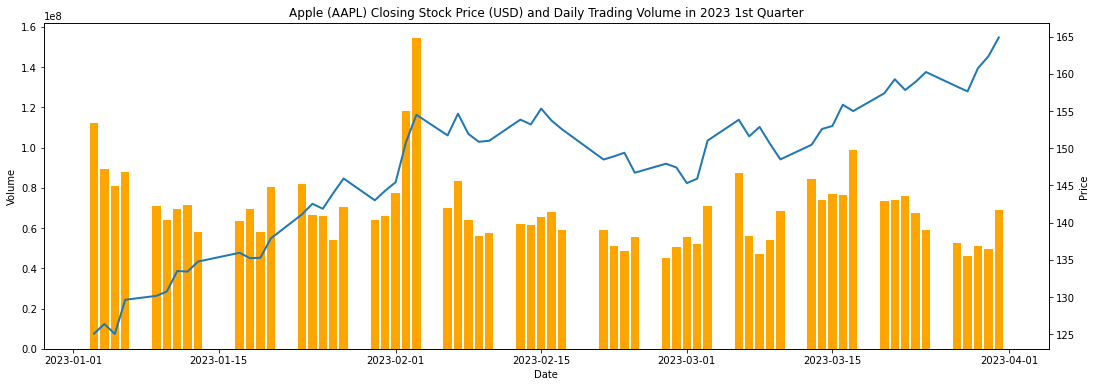

In [24]:
# combine 2 charts together
fig, ax1 = plt.subplots(1, 1, figsize=(18, 6))
ax2 = ax1.twinx()

ax1.set_title('Apple (AAPL) Closing Stock Price (USD) and Daily Trading Volume in 2023 1st Quarter')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume')
ax1.bar(df_aapl_2023.index,df_aapl_2023['Volume'],color=('#FFA500'))
ax2.set_ylabel('Price')
ax2.plot(df_aapl_2023.index,df_aapl_2023['Close'],lw=2)

plt.show()

In [28]:
# rearrange the current dataframe for applying API mplfinance
df_aapl_2023_updated = df_aapl_2023.iloc[:, [2,3,4,0,1]]
print(df_aapl_2023_updated)

               Open      High      Low   Close     Volume
Date                                                     
2023-03-31  162.440  165.0000  161.910  164.90   68749790
2023-03-30  161.530  162.4700  161.271  162.36   49501690
2023-03-29  159.370  161.0500  159.350  160.77   51305690
2023-03-28  157.970  158.4900  155.980  157.65   45992150
2023-03-27  159.940  160.7700  157.870  158.28   52390270
...             ...       ...      ...     ...        ...
2023-01-09  130.465  133.4100  129.890  130.15   70790810
2023-01-06  126.010  130.2900  124.890  129.62   87754720
2023-01-05  127.130  127.7700  124.760  125.02   80962710
2023-01-04  126.890  128.6557  125.080  126.36   89113630
2023-01-03  130.280  130.9000  124.170  125.07  112117500

[62 rows x 5 columns]


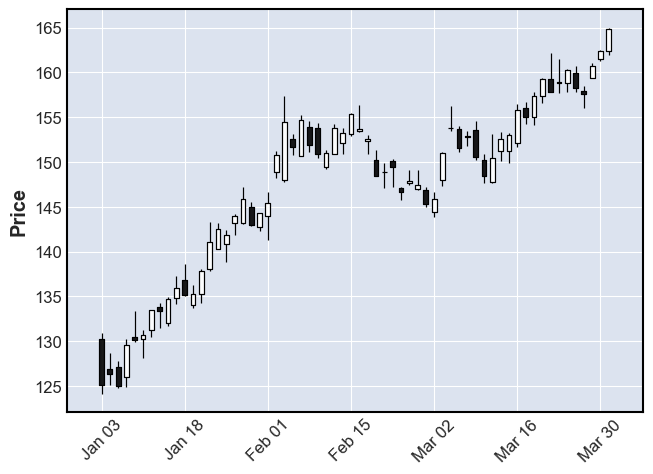

In [30]:
# set the date order
df_aapl_2023_updated = df_aapl_2023_updated.sort_values(by=['Date'], ascending=True)
# plot the candle stick chart via API mplfinance
mpf.plot(df_aapl_2023_updated,type='candle')

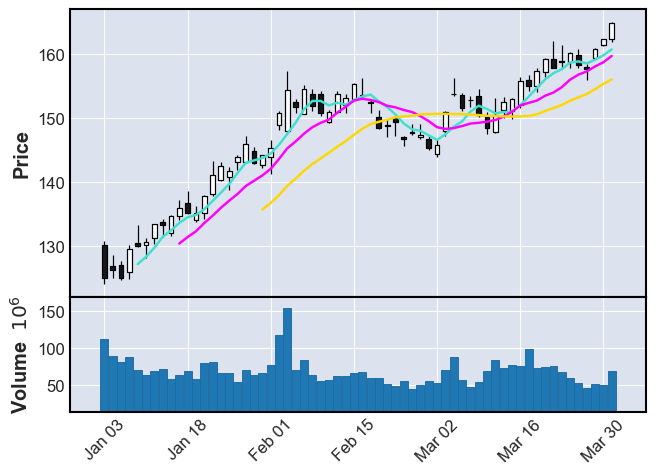

In [32]:
# adding moving average and corresponding trading volume to the candle stick chart
mpf.plot(df_aapl_2023_updated,type='candle',mav=(5,10,20),volume=True)